<a href="https://colab.research.google.com/github/bkksl/AI_Bootcamp_Group_Projects-/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [4]:
url = 'https://raw.githubusercontent.com/bkksl/AI_Bootcamp_Group_Projects-/main/insurance.csv'
data = pd.read_csv(url)

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df = data.copy()

In [7]:
df.shape

(1338, 7)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
corr = df.corr()

In [12]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


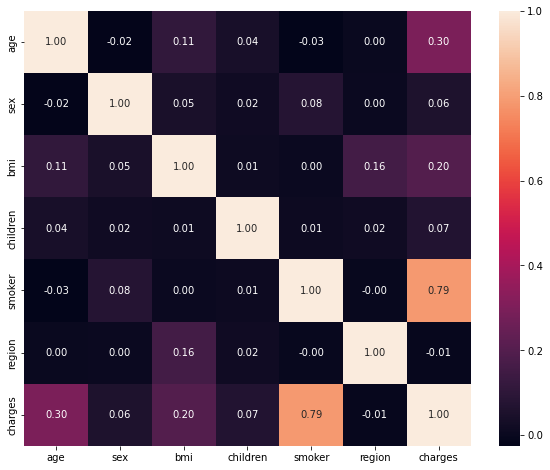

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax = sb.heatmap(corr,annot=True,fmt='.2f')

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

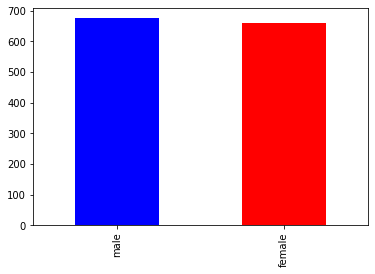

In [14]:
data['sex'].value_counts().plot(kind='bar',color=['blue','red'])

In [15]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

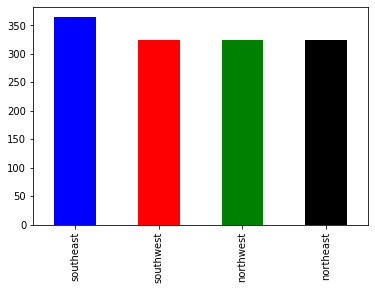

In [16]:
data['region'].value_counts().plot(kind='bar',color=['blue','red','green','black'])

## 3. Keşifsel Veri Analizi Yapılması

###  Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

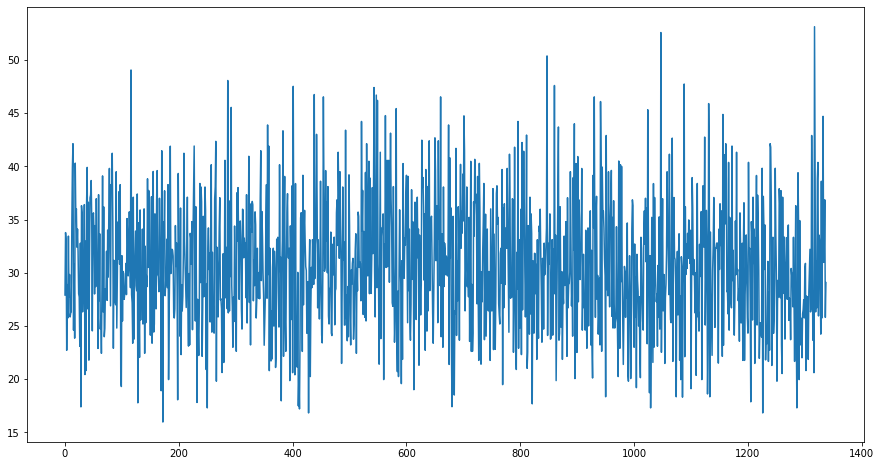

In [17]:
data['bmi'].plot(figsize=(15,8))

In [18]:
bmi_age = data.groupby('age').sum()['bmi']
bmi_age

age
18    2161.505
19    1944.590
20     888.350
21     789.200
22     870.455
23     880.725
24     815.995
25     831.430
26     824.010
27     821.340
28     825.500
29     793.345
30     825.055
31     807.795
32     821.540
33     810.240
34     787.125
35     784.870
36     734.355
37     780.415
38     724.915
39     747.755
40     813.755
41     850.685
42     818.860
43     815.520
44     832.795
45     863.590
46     908.885
47     889.265
48     925.845
49     848.790
50     902.835
51     920.085
52     955.145
53     850.105
54     874.560
55     830.700
56     821.625
57     801.955
58     817.955
59     764.300
60     697.655
61     748.610
62     743.880
63     734.240
64     725.475
Name: bmi, dtype: float64

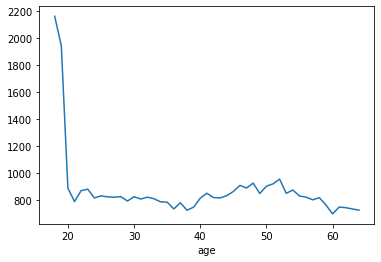

In [19]:
bmi_age.plot()

In [20]:
bmi_sex=data.groupby('sex').sum()['bmi']
bmi_sex

sex
female    20110.070
male      20917.555
Name: bmi, dtype: float64

<BarContainer object of 2 artists>

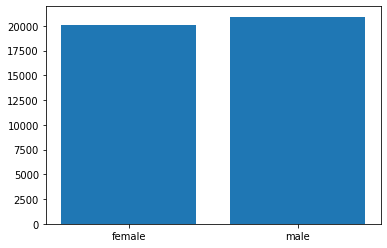

In [21]:
plt.bar(['female','male'],bmi_sex)

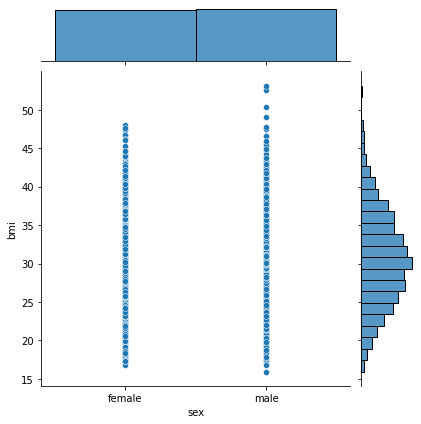

In [22]:
sb.jointplot(x='sex',y='bmi',data=data,kind='scatter')

### “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

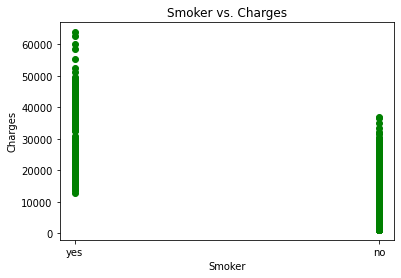

In [24]:
plt.scatter(x=df["smoker"], y=df["charges"], color="green")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Smoker vs. Charges")
plt.show()

In [25]:
data_corr = data[['smoker','charges']]
data_corr

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [26]:
data['smoker']=data['smoker'].astype('category').cat.codes
#data['charges']=data['charges'].astype('category').cat.codes

data['charges'].corr(data['smoker'])

0.787251430498478

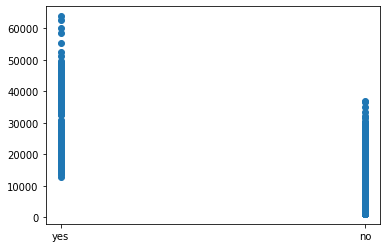

In [27]:
plt.scatter(data_corr['smoker'],data_corr['charges'])

In [28]:
smoker_charges =data.groupby('smoker').sum()['charges']
smoker_charges

smoker
0    8.974061e+06
1    8.781764e+06
Name: charges, dtype: float64

<BarContainer object of 2 artists>

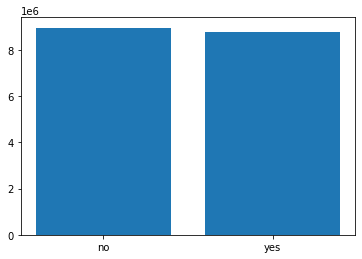

In [29]:
plt.bar(['no','yes'],smoker_charges)

In [30]:
yes_smoker = data[data['smoker'] == 'yes']['charges']
yes_smoker

Series([], Name: charges, dtype: float64)

In [31]:
no_smoker = data[data['smoker'] == 'no']['charges']
no_smoker

Series([], Name: charges, dtype: float64)

In [34]:
smokers = df[df["smoker"] == "yes"]
nonSmokers = df[df["smoker"] == "no"]

print(str(smokers.shape[0]) + " kisi sigara iciyor," + str(nonSmokers.shape[0]) + ' kisi sigara icmiyor.')
print('sigara icenlerin ortalama odedigi ucret: ' + str(smokers["charges"].mean()))
print('sigara icmeyenlerin ortalama odedigi ucret: ' + str(nonSmokers["charges"].mean()))

274 kisi sigara iciyor,1064 kisi sigara icmiyor.
sigara icenlerin ortalama odedigi ucret: 32050.23183153284
sigara icmeyenlerin ortalama odedigi ucret: 8434.268297856204


###  “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz

In [42]:
data_corr_reg = data[['smoker','region']]
data_corr_reg

,smoker,region
0,1,southwest
1,0,southeast
2,0,southeast
3,0,northwest
4,0,northwest
...,...,...
1333,0,northwest
1334,0,northeast
1335,0,southeast
1336,0,southwest


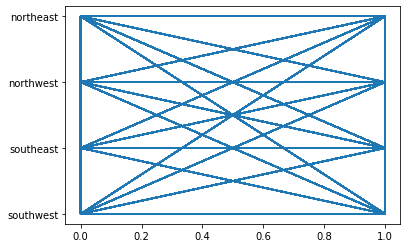

In [43]:
plt.plot(data_corr_reg['smoker'],data_corr_reg['region'])

In [44]:
smoker=data['smoker'].astype('category').cat.codes
region=data['region'].astype('category').cat.codes

smoker.corr(region)

-0.002180682040934647

In [45]:
yes_smk_rg = data[data['smoker'] == 'yes']['region']
yes_smk_rg

Series([], Name: region, dtype: object)

In [46]:
no_smk_rg = data[data['smoker'] == 'no']['region']
no_smk_rg

Series([], Name: region, dtype: object)

###  “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

In [47]:
data.groupby(by='sex').sum()['bmi'].sort_values(ascending=False)

sex
male      20917.555
female    20110.070
Name: bmi, dtype: float64

In [48]:
data_bmi_sex = data[['bmi','sex']]
data_bmi_sex

,bmi,sex
0,27.900,female
1,33.770,male
2,33.000,male
3,22.705,male
4,28.880,male
...,...,...
1333,30.970,male
1334,31.920,female
1335,36.850,female
1336,25.800,female


In [49]:
sex=data['sex'].astype('category').cat.codes

sex.corr(data['bmi'])

0.046371150646294566

In [50]:
sex

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int8

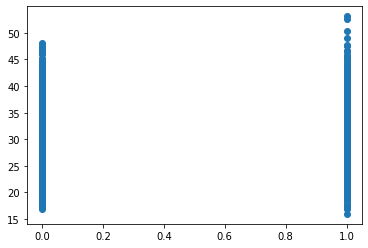

In [51]:
plt.scatter(sex,data['bmi'])

In [52]:
male_bmi = data[data['sex'] == 'male']['bmi']
male_bmi

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [53]:
female_bmi = data[data['sex'] == 'female']['bmi']
female_bmi

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

###  En çok “children”’a sahip “region”’ı bulunuz

In [54]:
data.groupby(by='region').sum().sort_values(by='children',ascending=False)

,age,bmi,children,smoker,charges
region,,,,,
southeast,14174,12141.580,382,91,5.363690e+06
northwest,12739,9489.930,373,58,4.035712e+06
southwest,12823,9943.900,371,58,4.012755e+06
northeast,12723,9452.215,339,67,4.343669e+06


In [55]:
children = data.groupby(by='region').sum()['children'].sort_values(ascending=False)
children

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

In [56]:
x = np.array(["southeast", "northwest", "southwest", "northeast"])

<BarContainer object of 4 artists>

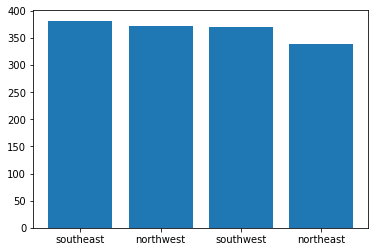

In [57]:
plt.bar(x,children)

### “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

### “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

### “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [58]:
outliers = []

def outlier_bul(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers  

In [59]:
outlier = outlier_bul(data['bmi'])
outlier

[49.06, 50.38, 52.58, 53.13]

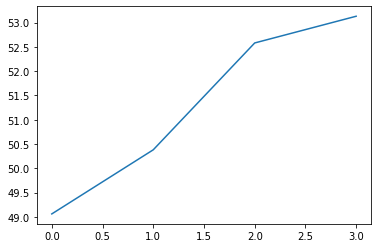

In [60]:
plt.plot(outlier)

### “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

### “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz

## Veri Ön İşleme Yapılması

In [61]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [62]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker         int8
region       object
charges     float64
dtype: object

In [63]:
print(data["sex"].unique())
data["sex"].value_counts()

['female' 'male']


male      676
female    662
Name: sex, dtype: int64

In [64]:
print(data["smoker"].unique())
data["smoker"].value_counts()

[1 0]


0    1064
1     274
Name: smoker, dtype: int64

In [65]:
print(data["region"].unique())
data["region"].value_counts()

['southwest' 'southeast' 'northwest' 'northeast']


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder = LabelEncoder()

In [68]:
df["sex"] = label_encoder.fit_transform(df["sex"])

In [69]:
df["sex"] #0:female,1:male

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [70]:
df["smoker"] = label_encoder.fit_transform(df["smoker"]) #1:yes,2:no

In [71]:
df["region"] = label_encoder.fit_transform(df["region"]) #3:southwest,2:southeast,1:northwest,0:northeast

In [72]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [73]:
from sklearn import preprocessing

In [74]:
scaler = preprocessing.MinMaxScaler()
data['bmi'] = scaler.fit_transform(data[['bmi']])

In [75]:
scaler2 = preprocessing.MinMaxScaler()
data['charges'] = scaler.fit_transform(data[['charges']])

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
ohe = OneHotEncoder()

In [78]:
feature_array = ohe.fit_transform(data[["sex","smoker","region"]]).toarray()
feature_array

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [79]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [93]:
#normalizasyon
df = (df / df.max(axis=0))

In [94]:
X = df.drop('charges', axis=1)
y = df['charges']

In [95]:
X

,age,sex,bmi,children,smoker,region
0,0.296875,0.0,0.525127,0.0,1.0,1.000000
1,0.281250,1.0,0.635611,0.2,0.0,0.666667
2,0.437500,1.0,0.621118,0.6,0.0,0.666667
3,0.515625,1.0,0.427348,0.0,0.0,0.333333
4,0.500000,1.0,0.543572,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.781250,1.0,0.582910,0.6,0.0,0.333333
1334,0.281250,0.0,0.600791,0.0,0.0,0.000000
1335,0.281250,0.0,0.693582,0.0,0.0,0.666667
1336,0.328125,0.0,0.485601,0.0,0.0,1.000000


In [96]:
y

0       0.264777
1       0.027059
2       0.069773
3       0.344744
4       0.060637
          ...   
1333    0.166230
1334    0.034593
1335    0.025558
1336    0.031487
1337    0.456973
Name: charges, Length: 1338, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [99]:
print(f"Shape of X Train: {X_train.shape}\nShape of y Train: {y_train.shape}\nShape of X Test: {X_test.shape}\nShape of y Test: {y_test.shape}")

Shape of X Train: (1070, 6)
Shape of y Train: (1070,)
Shape of X Test: (268, 6)
Shape of y Test: (268,)


In [100]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


## Model Seçme

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lin_model = sklearn.linear_model.LinearRegression()

In [104]:
lin_model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [106]:
predictions = lin_model.predict(X_test)
predictions

array([ 0.13994586,  0.1115924 ,  0.57877945,  0.14909536,  0.42360308,
        0.16921291,  0.00354864,  0.26568296,  0.01656929,  0.17669507,
        0.43983707,  0.14778579,  0.08352339,  0.6031018 ,  0.63200777,
        0.58251154,  0.23973367,  0.563977  ,  0.14394094,  0.49412922,
        0.0595541 ,  0.15792317,  0.03626407,  0.11093564,  0.17801938,
        0.20240998,  0.22657597,  0.0973125 ,  0.15551108,  0.03511816,
        0.14208082,  0.20574681,  0.07241142,  0.0543812 ,  0.06904059,
        0.20335313,  0.03022475,  0.1373351 ,  0.52256748,  0.5118121 ,
        0.06041072,  0.06853328,  0.22080392,  0.17999933,  0.13845385,
        0.1888987 ,  0.08346824,  0.04862304,  0.55741519,  0.14429277,
        0.24924151,  0.03772971,  0.19440861,  0.02248544,  0.21088366,
        0.19632206,  0.06735546,  0.50497826,  0.2079831 ,  0.20138033,
        0.2212928 ,  0.16546217,  0.25557563,  0.12259845,  0.18484387,
        0.0645012 ,  0.41706948,  0.17247595,  0.03440039,  0.09

In [108]:
for i in range(len(X_test)):
    print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:{predictions[i]}")

0 : Actual Value: 0.14262203553932207 - Predicted Value:0.13994585771048998
1 : Actual Value: 0.08267430476040175 - Predicted Value:0.1115923985402835
2 : Actual Value: 0.4599464683756009 - Predicted Value:0.5787794542581634
3 : Actual Value: 0.14586531469635655 - Predicted Value:0.14909535638820928
4 : Actual Value: 0.5292467504641419 - Predicted Value:0.42360308454665274
5 : Actual Value: 0.07113420972003917 - Predicted Value:0.16921290789888474
6 : Actual Value: 0.03320251903700528 - Predicted Value:0.0035486424157789853
7 : Actual Value: 0.22283896146614554 - Predicted Value:0.2656829588277938
8 : Actual Value: 0.05853222593103308 - Predicted Value:0.016569291238054118
9 : Actual Value: 0.16095927878028993 - Predicted Value:0.17669506579639502
10 : Actual Value: 0.28632732396176996 - Predicted Value:0.4398370656560032
11 : Actual Value: 0.11379448635442833 - Predicted Value:0.14778579248981003
12 : Actual Value: 0.06190037017441684 - Predicted Value:0.08352338987038707
13 : Actual 

In [109]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

In [110]:
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.7833463107364539
MAE: 0.0656496910716976
MSE: 0.008270951713078168
